## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,Normalizer as norm,StandardScaler as std, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

## Importing Dataset

In [ ]:
df = pd.read_csv(r"data\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


## Checking Null Values

In [ ]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## Analyzing Categorical Data

In [ ]:
# printing number of unique values for the categorical data present in df
def categorical_unique(df):
  for i in df.columns:
    if df[i].dtype=="O":
      print (i," has ",len(df[i].unique())," unique values : ",df[i].unique())

categorical_unique(df)

gender  has  2  unique values :  ['female' 'male']
race/ethnicity  has  5  unique values :  ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education  has  6  unique values :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch  has  2  unique values :  ['standard' 'free/reduced']
test preparation course  has  2  unique values :  ['none' 'completed']


For the given data:

1. 'gender' has 2 unique values and there is no intrinsic order to them, so one hot encoding would be appropriate.
2. 'race/ethnicity' has 5 unique values and there is no intrinsic order to them, so one hot encoding would be appropriate.
3. 'parental level of education' has 6 unique values and there is an intrinsic order to them (higher level of education is better), so label encoding would be appropriate.
4. 'lunch' has 2 unique values and there is no intrinsic order to them, so one hot encoding would be appropriate.
5. 'test preparation course' has 2 unique values and there is no intrinsic order to them, so one hot encoding would be appropriate.




In [ ]:
# split x and y
target = ['parental level of education']
X = df.drop(target,axis=1)
Y = df[target]

In [ ]:
X.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,female,group B,standard,none,72,72,74
1,female,group C,standard,completed,69,90,88
2,female,group B,standard,none,90,95,93
3,male,group A,free/reduced,none,47,57,44
4,male,group C,standard,none,76,78,75


In [ ]:
Y.head()

,parental level of education
0,bachelor's degree
1,some college
2,master's degree
3,associate's degree
4,some college


## Encoding Data

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
col = [0,1,2,3]
transformer = [("hot",OneHotEncoder(),col)]
ct = ColumnTransformer(transformers=transformer,remainder="passthrough")
X_ct = pd.DataFrame(np.array(ct.fit_transform(X),dtype=str))


enc_col_names = ct.named_transformers_["hot"].get_feature_names_out()
col_names = list(enc_col_names) + list(X.columns.drop(X.columns[col]))
X_ct.columns = col_names
X_ct[enc_col_names]=X_ct[enc_col_names].astype(float)


In [ ]:
X_ct

#standard scale

std = std()
X_std = pd.DataFrame(std.fit_transform(X_ct),columns=X_ct.columns)


In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)

Y

array([1, 4, 3, 0, 4, 0, 4, 4, 2, 2, 0, 0, 2, 4, 3, 5, 2, 5, 3, 0, 2, 4,
       4, 5, 1, 3, 4, 1, 2, 3, 4, 4, 3, 4, 4, 0, 0, 5, 0, 0, 0, 0, 0, 4,
       0, 0, 0, 2, 0, 2, 4, 0, 4, 2, 5, 2, 0, 0, 4, 5, 1, 5, 0, 0, 5, 5,
       5, 4, 0, 0, 4, 4, 0, 5, 5, 0, 5, 1, 5, 3, 0, 2, 4, 0, 2, 4, 4, 0,
       4, 5, 1, 2, 2, 0, 4, 0, 5, 4, 4, 1, 4, 1, 0, 2, 4, 4, 3, 0, 0, 5,
       0, 2, 0, 4, 1, 2, 1, 1, 5, 4, 1, 0, 4, 2, 4, 2, 5, 4, 3, 1, 3, 5,
       4, 4, 1, 1, 5, 2, 0, 4, 5, 4, 4, 2, 4, 4, 5, 0, 1, 0, 5, 1, 0, 1,
       5, 4, 2, 4, 0, 0, 0, 4, 3, 2, 3, 1, 2, 3, 2, 4, 2, 5, 4, 0, 1, 3,
       2, 0, 3, 5, 3, 4, 2, 0, 5, 0, 2, 5, 5, 1, 0, 4, 5, 4, 3, 0, 5, 2,
       4, 1, 0, 4, 0, 0, 4, 5, 1, 2, 4, 4, 5, 4, 2, 0, 2, 5, 0, 2, 2, 5,
       2, 0, 5, 5, 0, 3, 4, 2, 5, 4, 4, 0, 1, 5, 1, 0, 1, 5, 4, 0, 2, 1,
       2, 4, 5, 0, 0, 2, 2, 2, 5, 4, 5, 3, 2, 4, 0, 0, 4, 3, 5, 4, 5, 2,
       2, 5, 1, 2, 0, 4, 1, 4, 0, 4, 4, 1, 5, 2, 5, 1, 2, 2, 1, 4, 5, 0,
       0, 5, 1, 5, 0, 5, 5, 1, 2, 0, 5, 0, 2, 0, 4,

In [ ]:
X_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender_female                      1000 non-null   float64
 1   gender_male                        1000 non-null   float64
 2   race/ethnicity_group A             1000 non-null   float64
 3   race/ethnicity_group B             1000 non-null   float64
 4   race/ethnicity_group C             1000 non-null   float64
 5   race/ethnicity_group D             1000 non-null   float64
 6   race/ethnicity_group E             1000 non-null   float64
 7   lunch_free/reduced                 1000 non-null   float64
 8   lunch_standard                     1000 non-null   float64
 9   test preparation course_completed  1000 non-null   float64
 10  test preparation course_none       1000 non-null   float64
 11  math score                         1000 non-null   float6

## Train Test Split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_std,Y,test_size=0.2)

## Check Correlation

In [ ]:
import matplotlib.pyplot as plt

def corr_heatmap(df):
  corr = df.corr()
  plt.figure(figsize=(15,8))
  caxes = plt.matshow(corr,fignum=1)
  plt.colorbar(caxes)
  plt.xticks(range(len(corr.columns)),corr.columns,rotation=90)
  plt.yticks(range(len(corr.columns)),corr.columns)
  plt.show()

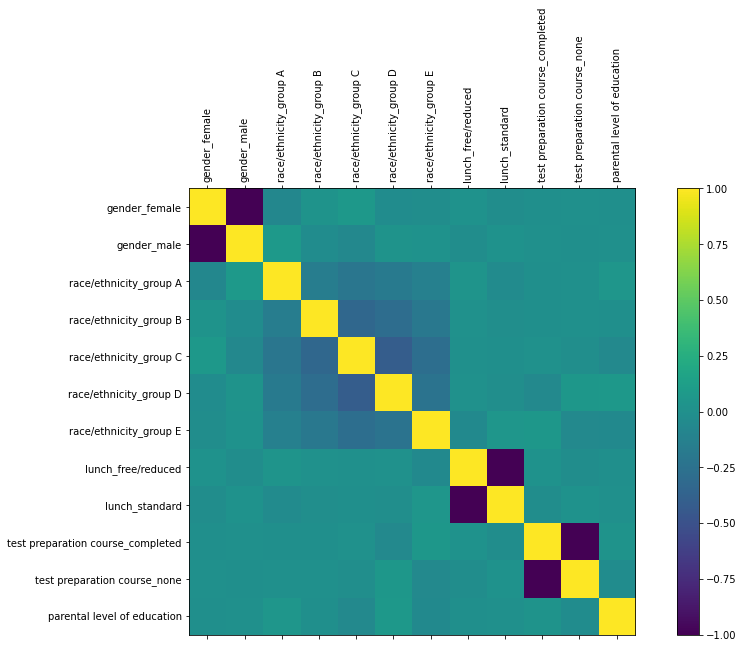

In [ ]:
corr_heatmap(X_ct)

## Simple Linear Regression to check RMSE

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

regressor = LinearRegression()

multi_regressor = MultiOutputRegressor(regressor)

multi_regressor.fit(X_train,y_train)

y_pred = multi_regressor.predict(X_test)
y_pred_rounded = np.round(y_pred)

print("MSE before rounding : ",mean_squared_error(y_test,y_pred))
print("MSE after rounding : ",mean_squared_error(y_test,y_pred_rounded))


In [ ]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()

multi_regressor = MultiOutputRegressor(regressor)

multi_regressor.fit(X_train,y_train)

y_pred = multi_regressor.predict(X_test)
y_pred_rounded = np.round(y_pred)

print("MSE before rounding : ",mean_squared_error(y_test,y_pred))
print("MSE after rounding : ",mean_squared_error(y_test,y_pred_rounded))


MSE before rounding :  230.40502421318843
MSE after rounding :  230.415


In [ ]:
X_std["Parent Level of Education"] = Y

X_std.to_csv("data\StudentsPerformance_processed.csv",index=False)